In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from bitcoin import engine
df = engine.load_data('BTC-EUR')
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
0,1520272320,9322.00,9322.01,9322.01,9322.00,0.273876,0.104927,1063075.0,0.034975,0.170432
1,1520272380,9322.00,9322.01,9322.01,9322.00,0.145773,0.104928,1063083.0,0.034975,0.170432
2,1520272440,9320.00,9320.01,9320.00,9320.00,0.066710,0.104928,1063089.0,0.034975,0.170432
3,1520272500,9320.01,9320.01,9320.01,9320.01,0.013989,0.104928,1063091.0,0.034975,0.170432
4,1520272560,9320.01,9320.01,9320.01,9320.01,0.706339,0.104928,1063095.0,0.038833,0.170432


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,1.598000e+03,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03,1598.000000,1598.000000
mean,1.520320e+09,9062.179149,9065.810169,9064.236615,9064.006640,1.323994,0.059329,8.727612e+05,0.056474,0.106435
std,2.783565e+04,243.694478,241.364395,242.383411,242.412212,3.628104,0.029050,2.694822e+05,0.032102,0.040376
min,1.520272e+09,8545.000000,8552.010000,8552.010000,8549.510000,0.001000,-0.015150,3.329640e+05,-0.010816,0.025257
25%,1.520296e+09,8831.000000,8835.020000,8832.252500,8832.000000,0.122372,0.043455,6.511260e+05,0.032393,0.075896
50%,1.520320e+09,9130.000000,9132.445000,9131.210000,9130.395000,0.376645,0.063361,8.378460e+05,0.061548,0.112896
75%,1.520344e+09,9215.007500,9215.510000,9215.510000,9215.500000,1.221317,0.082567,1.121273e+06,0.086548,0.134075
max,1.520369e+09,9399.000000,9399.000000,9399.000000,9399.000000,90.488639,0.118355,1.365095e+06,0.102910,0.174146


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,-0.932714,-0.933285,-0.933158,-0.933096,0.188374,-0.474035,-0.846710,-0.634567,-0.205440
low,-0.932714,1.000000,0.999338,0.999522,0.999724,-0.217343,0.416574,0.740383,0.668833,0.096185
high,-0.933285,0.999338,1.000000,0.999774,0.999698,-0.193213,0.416654,0.742736,0.670178,0.098031
open,-0.933158,0.999522,0.999774,1.000000,0.999522,-0.197327,0.416091,0.741954,0.669929,0.097347
close,-0.933096,0.999724,0.999698,0.999522,1.000000,-0.205100,0.417266,0.741576,0.669666,0.097338
volume,0.188374,-0.217343,-0.193213,-0.197327,-0.205100,1.000000,-0.008478,-0.163661,-0.093278,-0.008477
tw_sentiment,-0.474035,0.416574,0.416654,0.416091,0.417266,-0.008478,1.000000,0.222797,0.268070,0.237351
tw_followers,-0.846710,0.740383,0.742736,0.741954,0.741576,-0.163661,0.222797,1.000000,0.673609,0.078302
reddit_sentiment,-0.634567,0.668833,0.670178,0.669929,0.669666,-0.093278,0.268070,0.673609,1.000000,-0.408538
google_sentiment,-0.205440,0.096185,0.098031,0.097347,0.097338,-0.008477,0.237351,0.078302,-0.408538,1.000000


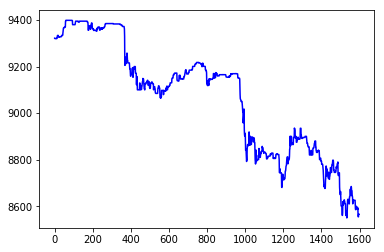

In [4]:
plt.plot(df['close'], 'b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fc0f0f0>,
      dtype=object)

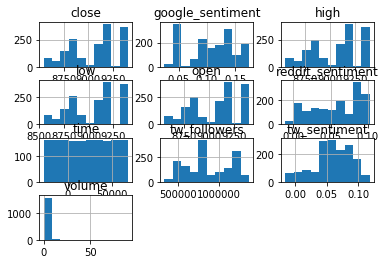

In [12]:
df.hist()

In [6]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = engine.prepare(df)

In [7]:
model, history = engine.train(X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

([<matplotlib.lines.Line2D at 0x11fc22e48>], 'g')

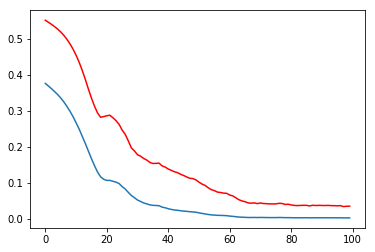

In [8]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

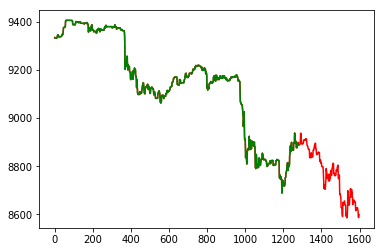

In [9]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_predict_train = model.predict(X_train)
y_predict_train = scaler_y.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scaler_y.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [10]:
engine.test_order_percent(df, model, scaler_x, scaler_y)

Error Order percentage: 21.00%


0.9478235055411481

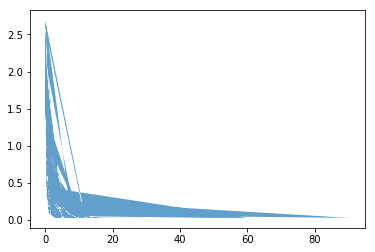

In [11]:
from sklearn.neighbors import KernelDensity
import numpy as np

X = df['volume'].values.reshape(-1, 1)

kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(X)
log_dens = kde.score_samples(X)
plt.fill(X, np.exp(log_dens), alpha=0.7)

kde.score(0.01)